<a href="https://colab.research.google.com/github/4nands/Perceptron/blob/main/Perceptron10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

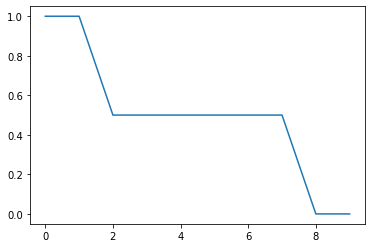

[[0]
 [0]
 [0]
 [1]]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  #シグモイド関数
  return 1/(1+np.exp(-x)+1e-6)    #1e-6は分母が0になるのを防ぐため

class Perceptron:
  def __init__(self): 
    #コンストラクタ
    self.W=np.random.randn(2,1)  #重みの初期化
    self.b=-0                     #バイアスの初期化
    self.X=None               #入力データの保存用
  
  def forward(self,X):
    #順伝播
    a=np.matmul(X,self.W)+self.b
    y=(a>0)*1       #ステップ関数
    #y=sigmoid(a)     #シグモイド関数　活性化関数
    self.X=X        #入力データを保存
    return y
  
  def backward(self,delta):
    #逆伝播

    #勾配
    dW=np.matmul(self.X.T,delta)
    db=np.sum(delta)

    lr=0.1

    #SGD パラメータの更新
    self.W-=lr*dW
    self.b-=lr*db
  def loss(self,y,t):
    #損失関数         MSE：mean squared error
    se=(y-t)**2   #誤差の２乗
    return np.sum(se)*0.5       #誤差の２乗を足す。平均をとるためにデータ数で割るのは省略。0.5は数学上のテクニック（２年になれば分かる）

  def step(self,X,t):
    #一回分の学習

    y=self.forward(X)   #予測
    delta=y-t           #誤差
    self.backward(delta) #逆伝播してパラメータを更新
    return self.loss(y,t)       #損失関数を計算する

  def fit(self,X,t,epochs=100):
    #学習
    loss=[]       #損失の初期化
    for __ in range(epochs): #epochsはエポック数
      l=self.step(X,t)  #１回分の学習
      loss.append(l)    #損失を記録
    return loss       #損失を返す
  def predict(self,X):
    #予測
    y=self.forward(X)
    return (y>0.5)*1

np.random.seed(0)   #乱数の初期化

#教師データ
X=np.array([[0,0],[1,0],[0,1],[1,1]]) #入力データ
t=np.array([[0],[0],[0],[1]])         #ANDの正解ラベル

model=Perceptron()   #ANDゲート
loss=model.fit(X,t,epochs=10)      #学習
plt.plot(loss)       #損失関数をグラフにする。
plt.show()

pred=model.predict(X)   #予測
print(pred)
